<a href="https://colab.research.google.com/github/beatrizrache/cesta-basica/blob/main/cesta_basica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Cesta Basica


https://www.dieese.org.br/metodologia/metodologiaCestaBasica.pdf



https://colab.research.google.com/github/nestauk/im-tutorials/blob/3-ysi-tutorial/notebooks/Web-Scraping/Web%20Scraping%20Tutorial.ipynb#scrollTo=wFO6XR13W8l5




![](https://github.com/beatrizrache/cesta-basica/blob/main/images/cesta-basica.png?raw=1)


## 1. Carne

### 1.1. Coxão  mole 

Da nota metodologica:

>Devem  ser pesquisados  além  do  coxão  mole  (chã  de  dentro)  mais dois  cortes  de carne bovina,cujos preços sejam semelhantes. Podem ser coxão duro (chã de fora) ou patinho etc..


Aqui screenshot do resultado de pesquisar manualmente "coxão  mole" no site do supermercado Pao de Acucar.

![](https://github.com/beatrizrache/cesta-basica/blob/main/images/pao-de-acucar.png?raw=1)

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd


In [2]:
url="https://www.paodeacucar.com/busca?w=cox%C3%A3o%20%20mole&qt=12&p=1&gt=grid"

In [3]:
# https://stackoverflow.com/questions/1695183/how-to-percent-encode-url-parameters-in-python#1695199
from urllib.parse import quote
quote('coxão mole')


'cox%C3%A3o%20mole'

In [4]:
response = requests.get(url)

In [5]:
response.text

'<!DOCTYPE html><html lang="pt-BR"><head><style data-styled="ehWSsq dUkkQd lnMtOh jTZnCz dritvl eeehfH hcByGl kWpRDt ibFrFK fNLVHt fjozxB gKUKvM fvpdaD joZCZM cyKuFu ixBhPZ jBZgMV hEZJoW gnOQxK bYLIek cfnpOh cPwENl idrKea bucezZ dZKLFQ lIVSr dxbLFG iNeEAZ kBnCPy fJlsKO hLDEse jlQUxd fRmzfX grmHpc dazpMc bUvOyN eSKxXS gkXgHs gANAFV khMteB DrwhJ eMLfYp hlLbEt hCrqOS gfPVhd blVpqZ heMNqA fPlYuk iwQubh gILsvp cpYEwe cJyLIZ jpsRrd ifFCVL cCWHRv dhbiEe dYrNHb fZbsvR bCRWfL hTYfcQ HEuZJ koutsY dhoqNi ifgGYQ  gHcwqf jOrCMV jSNVZP lenyJJ bqTLWm eWwJcz kozDio drESlq" data-styled-version="4.3.2">\n/* sc-component-id: hyperlinkstyles__Link-j02w35-0 */\n.hcByGl{display:inline;margin-bottom:8px;color:#88B04B;font-size:16px;font-weight:null;font-family:openSans;-webkit-text-decoration:none;text-decoration:none;cursor:pointer;white-space:normal;} .hcByGl:hover{-webkit-text-decoration:underline;text-decoration:underline;color:#88B04B;}.kWpRDt{display:inline;margin-bottom:8px;color:#88B04B;font-size:14p

In [6]:
# Parse the whole HTML page using BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')

# Title of the parsed page
soup.title

<title>coxão  mole | Pão de Açúcar</title>

Traversar o DOM pode ser bem painful. Depois de muitas tentativas de achar a correta posicao no DOM sem sucesso, olhando com cuidado o response object percebi que tinha formato Json! Que é beeem mais facil de se trabalhar.


![](https://github.com/beatrizrache/cesta-basica/blob/main/images/dom-tree.png?raw=1)

In [7]:
soup.find_all("a", "product-cardstyles__Link-sc-1uwpde0-7 hxEXIy hyperlinkstyles__Link-j02w35-0 dOMnau")

[]

In [8]:
list(soup.find_all("div")[0].children)

[<div class="boxstyles__BoxStyled-iohoom-0 ehWSsq" cursor="auto" display="flex" height="inherit" opacity="" overflow="visible" width="inherit"><div class="boxstyles__BoxStyled-iohoom-0 dUkkQd" cursor="auto" height="inherit" opacity="" overflow="hidden" width="100%"><div class="sidebarstyles__Sidebar-sc-1rqh2jf-0 lnMtOh"><div class="category-menustyles__CategoryMenu-sc-1f1zulv-0 jTZnCz"><div class="category-menustyles__Header-sc-1f1zulv-1 dritvl"><div class="category-menustyles__LogoContainer-sc-1f1zulv-2 eeehfH"><a class="hyperlinkstyles__Link-j02w35-0 hcByGl" font-family="primaryMedium" font-size="16" href="/"><img class="category-menustyles__Logo-sc-1f1zulv-3 ibFrFK" src="https://static.gpa.digital/images/pa/logo-pa.png"/></a></div><div class="category-menustyles__CloseContainer-sc-1f1zulv-4 fNLVHt"><svg fill="currentColor" viewbox="0 0 24 24"><path d="M0 0h24v24H0z" fill="none"></path><path d="M19 6.41L17.59 5 12 10.59 6.41 5 5 6.41 10.59 12 5 17.59 6.41 19 12 13.41 17.59 19 19 17.5

In [9]:
soup.text


'\n/* sc-component-id: hyperlinkstyles__Link-j02w35-0 */\n.hcByGl{display:inline;margin-bottom:8px;color:#88B04B;font-size:16px;font-weight:null;font-family:openSans;-webkit-text-decoration:none;text-decoration:none;cursor:pointer;white-space:normal;} .hcByGl:hover{-webkit-text-decoration:underline;text-decoration:underline;color:#88B04B;}.kWpRDt{display:inline;margin-bottom:8px;color:#88B04B;font-size:14px;font-weight:null;font-family:openSans;-webkit-text-decoration:none;text-decoration:none;cursor:pointer;white-space:normal;} .kWpRDt:hover{-webkit-text-decoration:underline;text-decoration:underline;color:#88B04B;}\n/* sc-component-id: textstyles__TextComponent-w4b5ef-0 */\n.koutsY{font-family:openSans;font-size:14px;text-align:left;font-style:normal;color:#FFFFFF;font-weight:normal;line-height:19px;margin:1em 0px;white-space:normal;text-transform:none;-webkit-text-decoration:none;text-decoration:none;}.dhoqNi{font-family:openSans;font-size:14px;text-align:left;font-style:normal;colo

In [10]:
import json

In [11]:
jsn=json.loads(soup.find("html").find("body").find("script").text)

In [12]:
jsn.keys()

dict_keys(['props', 'page', 'query', 'buildId', 'isFallback', 'customServer', 'gip', 'appGip', 'head'])

In [13]:
jsn

{'appGip': True,
 'buildId': 'eaCuKU7EjySMZyQMQmp-8',
 'customServer': True,
 'gip': True,
 'head': [['link',
   {'href': 'https://www.paodeacucar.com', 'real': 'canonical'}],
  ['link',
   {'href': 'https://static.gpa.digital/images/pa/favicon.ico',
    'rel': 'shortcut icon'}],
  ['link',
   {'async': 'async',
    'defer': 'defer',
    'href': 'https://static.gpa.digital/css/pa/fonts.css',
    'rel': 'stylesheet'}],
  ['link',
   {'crossOrigin': 'crossorigin',
    'href': 'https://www.googletagmanager.com/',
    'rel': 'preconnect'}],
  ['link',
   {'crossOrigin': 'crossorigin',
    'href': 'https://assets.adobedtm.com/',
    'rel': 'preconnect'}],
  ['link',
   {'crossOrigin': 'crossorigin',
    'href': 'https://cdnjs.cloudflare.com/',
    'rel': 'preconnect'}],
  ['link',
   {'crossOrigin': 'crossorigin',
    'href': 'https://b.sli-spark.com/',
    'rel': 'preconnect'}],
  ['link',
   {'crossOrigin': 'crossorigin',
    'href': 'https://s3-sa-east-1.amazonaws.com/',
    'rel': 'prec

In [14]:
jsn['props'].keys()

dict_keys(['initialProps', 'initialState'])

In [15]:
jsn['props']['initialProps']['componentProps']['initialParams']

{'customerId': '',
 'filters': {'filters': []},
 'isMultiSearch': False,
 'maxResults': '12',
 'ppc': None,
 'sellType': None,
 'skipResults': 0,
 'sort': None,
 'storeId': 501,
 't': None}

In [16]:
# Nested keys 
jsn['props']['initialProps']['componentProps'].keys()
len(jsn['props']['initialProps']['componentProps'].keys())

4

In [17]:
jsn['props']['initialProps']['componentProps']['searchResponse'].keys()

dict_keys(['result_meta', 'userid', 'pages', 'manual_click_logging', 'automatic_click_logging', 'facets', 'results', 'productList', 'totalProducts', 'qtyRequestedProducts'])

In [18]:
jsn['props']['initialProps']['componentProps']['searchResponse']['results']

[{'categorias': ['Bovina'],
  'image_url': 'http://www.paodeacucar.com/img/uploads/1/450/666450x200x200.jpg',
  'instock': '1',
  'mainShelfId': '10070',
  'price': '49,90',
  'rank': 1,
  's_id': 0,
  'shelfList': [],
  'shelfname': 'bovina',
  'sku': '0034838',
  'text': '',
  'title': 'Coxão Mole Bovino Peça Resfriado Bandeja 1kg',
  'url': 'https://www.paodeacucar.com/produto/64376'},
 {'categorias': ['Bovina'],
  'image_url': 'http://www.paodeacucar.com/img/uploads/1/984/471984x200x200.jpg',
  'instock': '1',
  'mainShelfId': '10070',
  'price': '25,17',
  'rank': 2,
  's_id': 0,
  'shelfList': [],
  'shelfname': 'bovina',
  'sku': '0077224',
  'text': 'BIFE <b>COXAO</b> <b>MOLE</b> BOVINO 500G',
  'title': 'Coxão Mole (Chã de Dentro) em Bife Bandeja 500g',
  'url': 'https://www.paodeacucar.com/produto/168491'},
 {'categorias': ['Bovina'],
  'image_url': 'http://www.paodeacucar.com/img/uploads/1/579/511579x200x200.jpg',
  'instock': '1',
  'mainShelfId': '10070',
  'price': '27,20

In [19]:
len(jsn['props']['initialProps']['componentProps']['searchResponse']['results'])

8

In [20]:
results=jsn['props']['initialProps']['componentProps']['searchResponse']['results']

In [21]:
import pandas as pd

In [22]:
df= pd.DataFrame.from_records(results)

In [23]:
df

title  ...              brand
0       Coxão Mole Bovino Peça Resfriado Bandeja 1kg  ...                NaN
1    Coxão Mole (Chã de Dentro) em Bife Bandeja 500g  ...                NaN
2  Coxão Mole para Strogonoff Resfriado Bandeja 400g  ...                NaN
3      Coxão Mole Capa Bovino Resfriado Bandeja 500g  ...              BASSI
4  Coxão Mole Resfriada Novilho CONFRARIA GOURMET...  ...  CONFRARIA GOURMET
5           Tiras de Coxão Mole Congelado SWIFT 500G  ...                NaN
6  Coxão Mole para Strogonoff Rubia Gallega Quali...  ...                NaN
7                     Cubos De Coxão Mole SWIFT 500g  ...                NaN

[8 rows x 14 columns]

In [24]:
df.loc[0,:] # first row. first column?

title               Coxão Mole Bovino Peça Resfriado Bandeja 1kg
url                    https://www.paodeacucar.com/produto/64376
text                                                            
rank                                                           1
shelfList                                                     []
s_id                                                           0
image_url      http://www.paodeacucar.com/img/uploads/1/450/6...
price                                                      49,90
instock                                                        1
shelfname                                                 bovina
sku                                                      0034838
mainShelfId                                                10070
categorias                                              [Bovina]
brand                                                        NaN
Name: 0, dtype: object

Agora precisamos extrair do titulo a quantidade da carne! Stackoverflow to the rescue!

https://stackoverflow.com/questions/59202131/regex-to-extract-both-integer-or-float-values-followed-by-a-unit-python

Tambem um otimo recurso para testar teu regex: https://regexr.com/

![](https://github.com/beatrizrache/cesta-basica/blob/main/images/regex.png?raw=1)

In [25]:
import re

In [26]:
df['produto']="coxao mole"

In [27]:
txt="Coxão Mole Bovino Peça Resfriado Bandeja 1kg"

In [28]:
# pattern we're looking for
q=re.search("([.\d]+)\s*(?:mg|kg|ml|q.s.|ui|M|g|µg)",txt)

In [29]:
q

<re.Match object; span=(41, 44), match='1kg'>

In [30]:
q.group()

'1kg'

In [31]:
# Pegar só numero
re.search("([.\d]+)",q.group()).group()

'1'

In [32]:
# Pegar só unidade
re.search("(?:mg|kg|ml|q.s.|ui|M|g|µg)",q.group()).group()

'kg'

In [33]:
import numpy as np # 

In [34]:
# Create function to retrieve quantity
def get_quantity(text):
    q = re.search("([.\d]+)\s*(?:mg|kg|ml|q.s.|ui|M|g|µg|L)",text.lower())
    if q: # se existe, devolver quantidade
        quantity = re.search("([.\d]+)",q.group()).group()
        return int(quantity)
    else: # se não, devolver nada
        return np.nan


In [35]:
def get_unit(text):
    q = re.search("([.\d]+)\s*(?:mg|kg|ml|q.s.|ui|M|g|µg|L)",text.lower())
    if q:
        unit = re.search("(?:mg|kg|ml|q.s.|ui|M|g|µg|L)",q.group()).group()
        return unit
    else:
        return None


In [36]:
df['quantity']=df['title'].apply(get_quantity)
# criar nova coluna no data frame, baseada em transformação de coluna existente

In [37]:
df['unit']=df['title'].apply(get_unit)

In [38]:
from datetime import date

In [39]:
df['date_scraped']=date.today()

In [40]:
df

title  ... date_scraped
0       Coxão Mole Bovino Peça Resfriado Bandeja 1kg  ...   2021-06-14
1    Coxão Mole (Chã de Dentro) em Bife Bandeja 500g  ...   2021-06-14
2  Coxão Mole para Strogonoff Resfriado Bandeja 400g  ...   2021-06-14
3      Coxão Mole Capa Bovino Resfriado Bandeja 500g  ...   2021-06-14
4  Coxão Mole Resfriada Novilho CONFRARIA GOURMET...  ...   2021-06-14
5           Tiras de Coxão Mole Congelado SWIFT 500G  ...   2021-06-14
6  Coxão Mole para Strogonoff Rubia Gallega Quali...  ...   2021-06-14
7                     Cubos De Coxão Mole SWIFT 500g  ...   2021-06-14

[8 rows x 18 columns]

In [41]:
# normalizar a kilos
# where ~ ifelse
df['kg']=np.where(df['unit']=="g",df['quantity']/1000,df['quantity'])

In [42]:
# Anonymous function
df.loc[:,'price']=df.loc[:,'price'].apply(lambda x: float(x.replace(",",".")))

In [43]:
df['price_per_kg']=df['price']/df['kg']

In [44]:
df

title  ... price_per_kg
0       Coxão Mole Bovino Peça Resfriado Bandeja 1kg  ...        49.90
1    Coxão Mole (Chã de Dentro) em Bife Bandeja 500g  ...        50.34
2  Coxão Mole para Strogonoff Resfriado Bandeja 400g  ...        68.00
3      Coxão Mole Capa Bovino Resfriado Bandeja 500g  ...        49.00
4  Coxão Mole Resfriada Novilho CONFRARIA GOURMET...  ...        79.98
5           Tiras de Coxão Mole Congelado SWIFT 500G  ...        42.78
6  Coxão Mole para Strogonoff Rubia Gallega Quali...  ...        65.65
7                     Cubos De Coxão Mole SWIFT 500g  ...        51.86

[8 rows x 20 columns]

In [45]:
df['price_per_kg'].mean()

57.18875

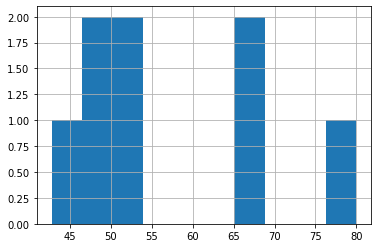

In [46]:
df['price_per_kg'].hist()

### 1.2. Patinho

Aqui ja vamos a repetir muito do codigo de cima, simplesmente vai mudar o produto. Por isso ja podemos criar funcoes para reutilizar.

In [47]:
def get_results(produto):

    url="https://www.paodeacucar.com/busca?w="+quote(produto)+"&qt=12&p=1&gt=grid"

    response = requests.get(url)

    # Parse the whole HTML page using BeautifulSoup
    soup = BeautifulSoup(response.text, 'html.parser')

    jsn=json.loads(soup.find("html").find("body").find("script").text)

    return jsn['props']['initialProps']['componentProps']['searchResponse']['results']

In [48]:
df2=pd.DataFrame.from_records(get_results("patinho"))

In [49]:
df2 # Includes toys as well as meat products -> restrict to shelfname bovina

title  ...            categorias
0       Bife de Patinho Bovino Resfriado Bandeja 500g  ...              [Bovina]
1   Carne Bovina Moída De Patinho Resfriada QUALIT...  ...              [Bovina]
2        Patinho de Novilho Rubia Gallega Qualitá 1kg  ...              [Bovina]
3                         Tiras De Patinho SWIFT 500g  ...       [Bovina, Swift]
4                        Patinho Bovino Resfriado 1kg  ...              [Bovina]
5         Carne Moída de Patinho Congelado SWIFT 500G  ...       [Bovina, Swift]
6         Carne Moída De Patinho SWIFT Congelada 900g  ...              [Bovina]
7       Bife de Patinho Milanesa Congelado SWIFT 900G  ...       [Bovina, Swift]
8                   Carne Moída Light de Patinho 240g  ...              [Bovina]
9                   Carne Moída Light de Patinho 240g  ...              [Bovina]
10         Mordedor Penduradinhos - Patinho - Toyster  ...          [Acessórios]
11  Patinho Didático Brinquedos para Bebês - Pica Pau  ...  [Artes e atividades]

[12 rows x 13 columns]

In [50]:
df2=df2[df2['shelfname']=="bovina"].copy() # ?

In [51]:
# use shelfname "bovina" to discriminate between meat and other products
df2['produto']="patinho"

In [52]:
df2

title  ...  produto
0      Bife de Patinho Bovino Resfriado Bandeja 500g  ...  patinho
1  Carne Bovina Moída De Patinho Resfriada QUALIT...  ...  patinho
2       Patinho de Novilho Rubia Gallega Qualitá 1kg  ...  patinho
3                        Tiras De Patinho SWIFT 500g  ...  patinho
4                       Patinho Bovino Resfriado 1kg  ...  patinho
5        Carne Moída de Patinho Congelado SWIFT 500G  ...  patinho
6        Carne Moída De Patinho SWIFT Congelada 900g  ...  patinho
7      Bife de Patinho Milanesa Congelado SWIFT 900G  ...  patinho
8                  Carne Moída Light de Patinho 240g  ...  patinho
9                  Carne Moída Light de Patinho 240g  ...  patinho

[10 rows x 14 columns]

In [53]:
df2['quantity']=df2['title'].apply(lambda x: get_quantity(x))

In [54]:
df2['unit']=df2['title'].apply(lambda x: get_unit(x))

In [55]:
df2

title  ... unit
0      Bife de Patinho Bovino Resfriado Bandeja 500g  ...    g
1  Carne Bovina Moída De Patinho Resfriada QUALIT...  ...    g
2       Patinho de Novilho Rubia Gallega Qualitá 1kg  ...   kg
3                        Tiras De Patinho SWIFT 500g  ...    g
4                       Patinho Bovino Resfriado 1kg  ...   kg
5        Carne Moída de Patinho Congelado SWIFT 500G  ...    g
6        Carne Moída De Patinho SWIFT Congelada 900g  ...    g
7      Bife de Patinho Milanesa Congelado SWIFT 900G  ...    g
8                  Carne Moída Light de Patinho 240g  ...    g
9                  Carne Moída Light de Patinho 240g  ...    g

[10 rows x 16 columns]

In [56]:
df2['date_scraped']=date.today()

In [57]:
def get_price_per_kilo(df):
    df['kg']=np.where(df['unit']=="g",df['quantity']/1000,df['quantity'])
    df.loc[:,'price']=df.loc[:,'price'].apply(lambda x: float(x.replace(",",".")))
    df['price_per_kg']=df['price']/df['kg']
    return df

In [58]:
df2=get_price_per_kilo(df2)

In [59]:
df2

title  ... price_per_kg
0      Bife de Patinho Bovino Resfriado Bandeja 500g  ...    45.560000
1  Carne Bovina Moída De Patinho Resfriada QUALIT...  ...    62.980000
2       Patinho de Novilho Rubia Gallega Qualitá 1kg  ...    26.500000
3                        Tiras De Patinho SWIFT 500g  ...    43.920000
4                       Patinho Bovino Resfriado 1kg  ...    59.350000
5        Carne Moída de Patinho Congelado SWIFT 500G  ...    46.780000
6        Carne Moída De Patinho SWIFT Congelada 900g  ...    47.211111
7      Bife de Patinho Milanesa Congelado SWIFT 900G  ...    47.766667
8                  Carne Moída Light de Patinho 240g  ...    68.750000
9                  Carne Moída Light de Patinho 240g  ...    63.708333

[10 rows x 19 columns]

In [60]:
df2['price_per_kg'].mean()

51.25261111111111

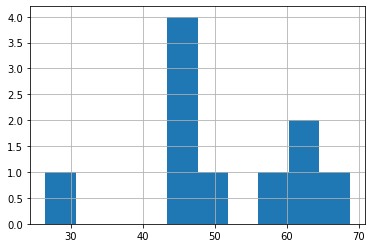

In [61]:
df2['price_per_kg'].hist()

In [62]:
df=df.append(df2)

In [63]:
len(df)

18

In [64]:
df.produto.value_counts()

patinho       10
coxao mole     8
Name: produto, dtype: int64

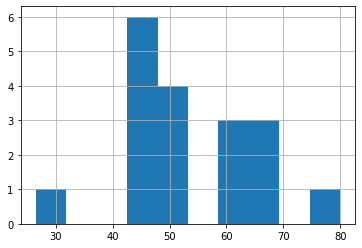

In [65]:
df['price_per_kg'].hist()

In [66]:
# ? plot per product

In [69]:
df.to_csv("data/cesta-basica.csv",index=False)

## Leite

In [77]:
df3=pd.DataFrame.from_records(get_results("leite"))

In [78]:
df3[pd.isnull(df3['shelfname'])] # NaN

title  ... categorias
11  Leite Pasteurizado Tipo A Integral Zero Lactos...  ...        NaN

[1 rows x 14 columns]

In [79]:
# Filter out other types of products
df3=df3[df3['shelfname']=='leite-longa-vida'].copy()

In [80]:
df3['produto']='leite'
df3['date_scraped']=date.today()

In [81]:
# Extract quantity and unity
df3['quantity']=df3['title'].apply(get_quantity)
df3['unit']=df3['title'].apply(get_unit)
df3.loc[:,'price']=df3.loc[:,'price'].apply(lambda x: float(x.replace(",",".")))
df3['price_per_kg']=df3['price']


In [82]:
df3

title  ... price_per_kg
1           Leite Desnatado MOLICO Zero Lactose 1L  ...         6.49
2                 Leite Paulista EDGE Desnatado 1L  ...         4.29
4             Leite Integral SHEFA Garrafa 1 Litro  ...         4.19
5                  Leite Paulista EDGE Integral 1L  ...         4.29
6  Leite Semidesnatado Piracanjuba Zero Lactose 1L  ...         4.99
7           Leite Integral JUSSARA Garrafa 1 Litro  ...         3.99
8        Leite Longa Vida Integral  ITALAC 1 Litro  ...         3.99
9     Leite Longa Vida Integral LEITÍSSIMO 1 Litro  ...         6.29

[8 rows x 19 columns]

In [83]:
df3['price_per_kg'].mean() 

4.815

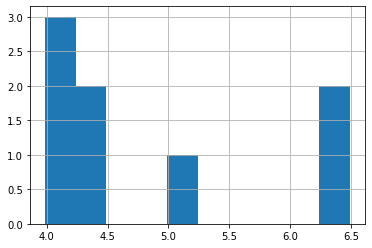

In [84]:
df3['price_per_kg'].hist()

In [85]:
df_all=df.append(df2).append(df3)

In [89]:
df_all.drop_duplicates('produto') # 3 products

title  ... price_per_kg
0   Coxão Mole Bovino Peça Resfriado Bandeja 1kg  ...        49.90
0  Bife de Patinho Bovino Resfriado Bandeja 500g  ...        45.56
1         Leite Desnatado MOLICO Zero Lactose 1L  ...         6.49

[3 rows x 20 columns]

Plot different prices by product in histogram

In [90]:
import matplotlib.pyplot as plt

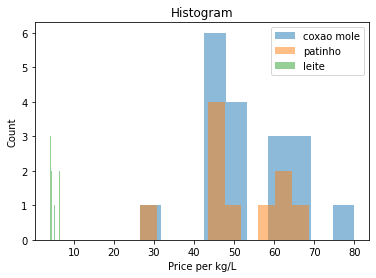

In [96]:
plt.figure()
plt.hist(df['price_per_kg'],label='coxao mole',alpha=0.5)
plt.hist(df2['price_per_kg'],label='patinho',alpha=0.5)
plt.hist(df3['price_per_kg'],label='leite',alpha=0.5)
plt.xlabel('Price per kg/L')
plt.title('Histogram')
plt.ylabel('Count')
plt.legend(loc='upper right')